In [31]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import pickle
import numpy as np

In [12]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

[Text(0.5, 1.0, 'True digit: 1')]

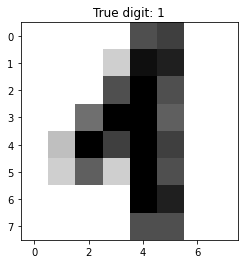

In [13]:
fig, ax = plt.subplots(1)
i = 200

ax.imshow(digits['data'][i].reshape(8, 8), cmap = plt.cm.binary)
ax.set(title = "True digit: " + str(digits['target'][i]))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [15]:
m = LogisticRegression(random_state = 0, solver = "liblinear")
cross_val_score(m, X_train, y_train, cv = 10).mean()

0.9658595909342177

In [16]:
m.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [19]:
y_train_pred = m.predict(X_train)
y_train_pred

array([5, 5, 6, ..., 2, 8, 6])

In [20]:
confusion_matrix(y_train, y_train_pred)

array([[130,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 143,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 125,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 136,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 138,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 135,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 137,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 132,   0,   0],
       [  0,   4,   0,   1,   0,   0,   0,   0, 130,   0],
       [  0,   0,   0,   1,   0,   0,   0,   0,   1, 134]])

In [33]:
filename = 'mnist-model/model.pkl'
pickle.dump(m, open(filename, 'wb'))

In [34]:
M = pickle.load(open(filename, 'rb'))

In [35]:
y_train_pred = M.predict(X_train)
y_train_pred

array([5, 5, 6, ..., 2, 8, 6])

In [51]:
for i in range(10):
    j = np.random.randint(0, digits["data"].shape[0])
    np.savetxt("mnist-model/sample-data/" + str(j) + ".txt", digits['data'][j].reshape(8, 8))

In [44]:
digits["data"].shape

(1797, 64)

In [47]:
np.random.randint(0, 10)

4

In [58]:
x = np.loadtxt("mnist-model/sample-data/1159.txt").reshape(1, 64)

In [63]:
m.predict(x)[0]

2

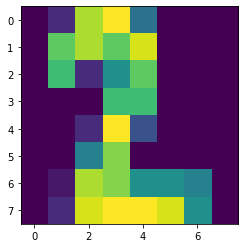

In [62]:
plt.imshow(x.reshape(8, 8))